In [1]:
%matplotlib widget

This notebook can be used to:
    
1) collect distance to source data from PiVR from different experimental conditions.

2) plot the mean distance to source

3) plot boxplots and run statistical tests

First, python requires you to 'import' module you need

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pathlib
import json
from tkinter import filedialog, Tk
from scipy import stats

# experimental condition 1 (no stimulation)

In [29]:
# Open a window which allows you to select the folder containing the data of interest
root = Tk()
root.withdraw()
filepath1 = pathlib.Path(filedialog.askdirectory())
print(filepath1)

2023-07-14 16:50:07.432 python[27617:2888014] +[CATransaction synchronize] called within transaction
2023-07-14 16:50:07.458 python[27617:2888014] +[CATransaction synchronize] called within transaction
2023-07-14 16:50:12.804 python[27617:2888014] +[CATransaction synchronize] called within transaction


/Users/dtadres/Desktop/HansOlivia/control


## next, we collect the individual 'distance_to_source.csv' files from each experiment

In [30]:
def collect_data(filepath):
    """
    This is a function.
    """

    # first, prepare an empty 'list', a type of variable in python
    exp_cond = []

    # Next, loop through the selected folder
    for current_experiment in filepath.iterdir():
        # Make sure to only collect data from folders (else there'll be an error)
        if current_experiment.is_dir():
            # read the csv file
            try:
                # These are real odor experiments
                data = pd.read_csv(pathlib.Path(current_experiment, 'distance_to_source.csv'))
            except FileNotFoundError:
                # These are VR experiments!
                data = pd.read_csv(pathlib.Path(current_experiment, 'distance_to_VR_max.csv'))
            # append (add) the data to list
            # note: we only add the columns '0' which contains our data
            # Further, we convert the column to a list (to_list())
            # finally, PiVR always collects a few frames less than desired. Calculating the distance
            # to source on these non-collected frames leads to huge spikes. We avoid looking at that 
            # data by only taking data up to the last 20 frames ([0:-20])
            exp_cond.append(data['0'].to_list()[0:-20])       

            # It's also a good idea to collect the experimental metadata here. PiVR saves the 
            # framerate and the recording time used for each experiment.
            # Note: This is for illustration only as it is overwriting the previous data in each loop
            # This is not a problem if you always use the same recording time and recording fps but
            # is blind if you don't!
            with open((pathlib.Path(current_experiment, 'experiment_settings.json')), 'r') as file:
                experiment_settings = json.load(file)
                recording_time = experiment_settings['Recording time']
                recording_fps = experiment_settings['Framerate']
    return(exp_cond,recording_fps)


In [31]:
# Run the function defined above             
exp_cond1,recording_fps1 = collect_data(filepath1)

## While lists can be useful to work with, Python has a powerful matrix computation module we'll use to manipulate our data

In [32]:
def convert_list_to_np_array(data):
    longest_experiment = 0
    for current_exp in data:
        if len(current_exp) > longest_experiment:
            longest_experiment = len(current_exp)

    data_np = np.zeros((longest_experiment, len(data)))
    data_np.fill(np.nan)

    for counter, current_exp in enumerate(data):
        data_np[0:len(current_exp), counter] = current_exp

    return(data_np)
    
exp_cond1_np = convert_list_to_np_array(exp_cond1) # convert the list to a numpy array

## Plot the data

<IPython.core.display.Javascript object>


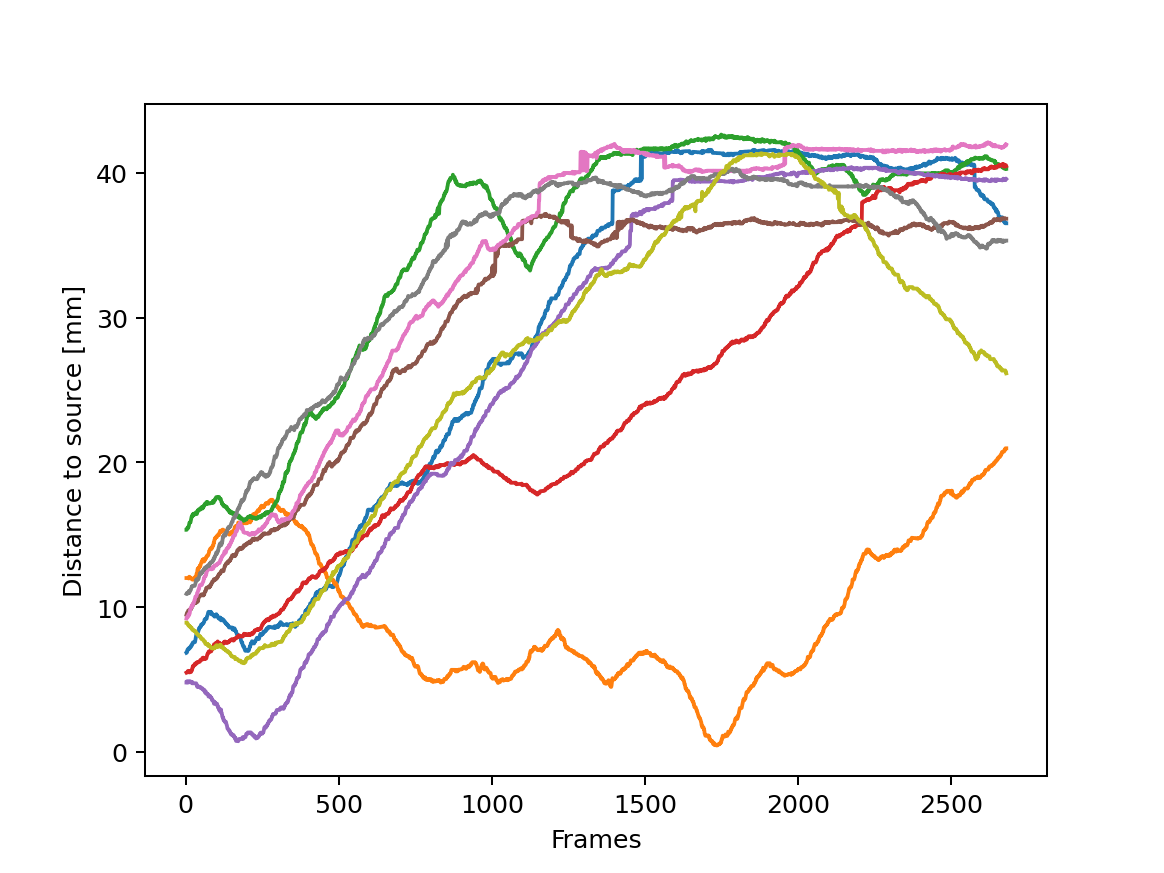

Text(0.5, 0, 'Frames')

In [33]:
# create a figure
figure = plt.figure()
ax = figure.add_subplot(111)

# plot the data
ax.plot(exp_cond1_np)

# label the axis
ax.set_ylabel('Distance to source [mm]')
ax.set_xlabel('Frames')

## We can also plot the mean

<IPython.core.display.Javascript object>


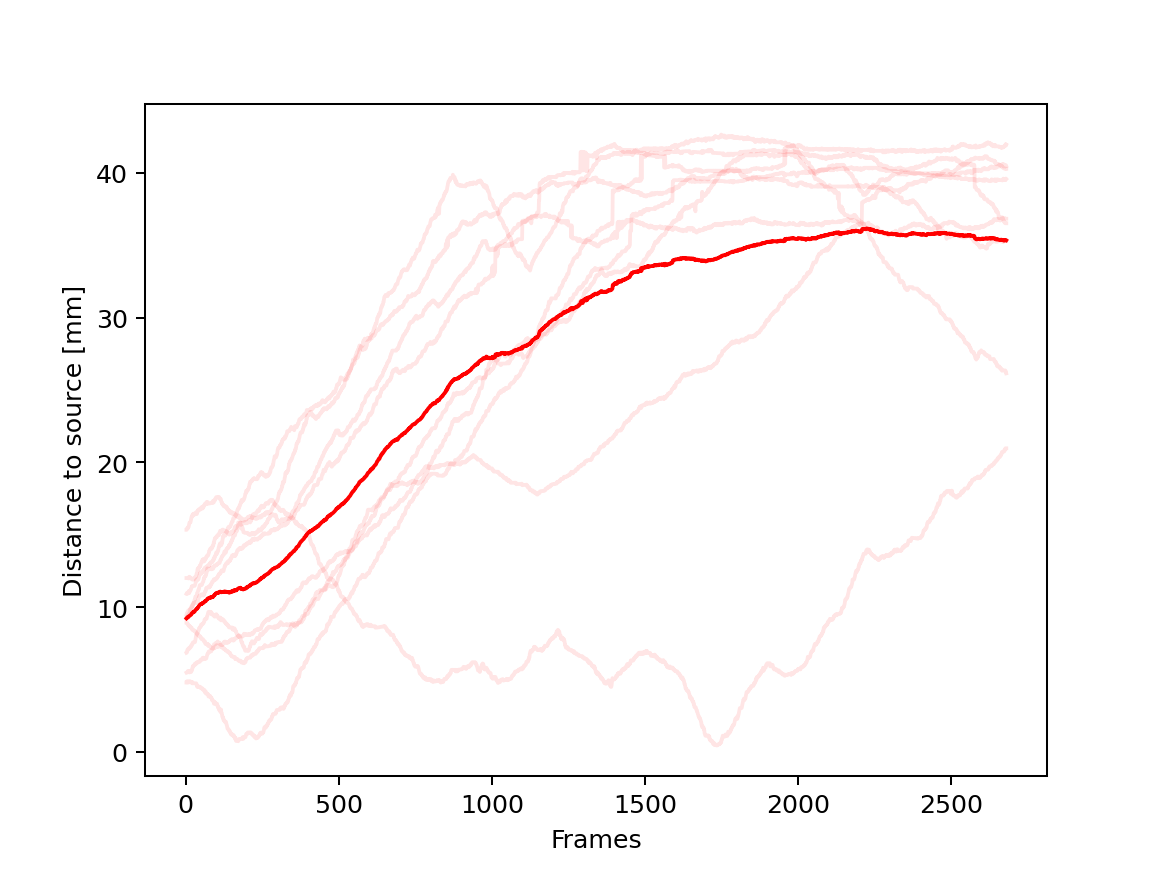

/var/folders/q0/9m96f32j1pl31hsqz1jkr4mr0000gq/T/ipykernel_27617/1403958069.py:6: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(exp_cond1_np, axis=1), color='red')


Text(0.5, 0, 'Frames')

In [34]:
# create a figure
figure = plt.figure()
ax = figure.add_subplot(111)

# plot the data
ax.plot(np.nanmean(exp_cond1_np, axis=1), color='red')
ax.plot(exp_cond1_np, color='red', alpha=0.1)

# label the axis
ax.set_ylabel('Distance to source [mm]')
ax.set_xlabel('Frames')

# Next, collected data from experimental condition 2

In [40]:
# Open a window which allows you to select the folder containing the data of interest
root = Tk()
root.withdraw()
filepath2 = pathlib.Path(filedialog.askdirectory())

# next, we collect the individual 'distance_to_source.csv' files from each experiment

# Run the function defined above             
exp_cond2, recording_fps2 = collect_data(filepath2)
            
exp_cond2_np = convert_list_to_np_array(exp_cond2) # convert the list to a numpy array

2023-07-14 16:51:58.689 python[27617:2888014] +[CATransaction synchronize] called within transaction
2023-07-14 16:51:58.714 python[27617:2888014] +[CATransaction synchronize] called within transaction
2023-07-14 16:52:05.852 python[27617:2888014] +[CATransaction synchronize] called within transaction


## Now we can plot the mean of both conditions:

<IPython.core.display.Javascript object>


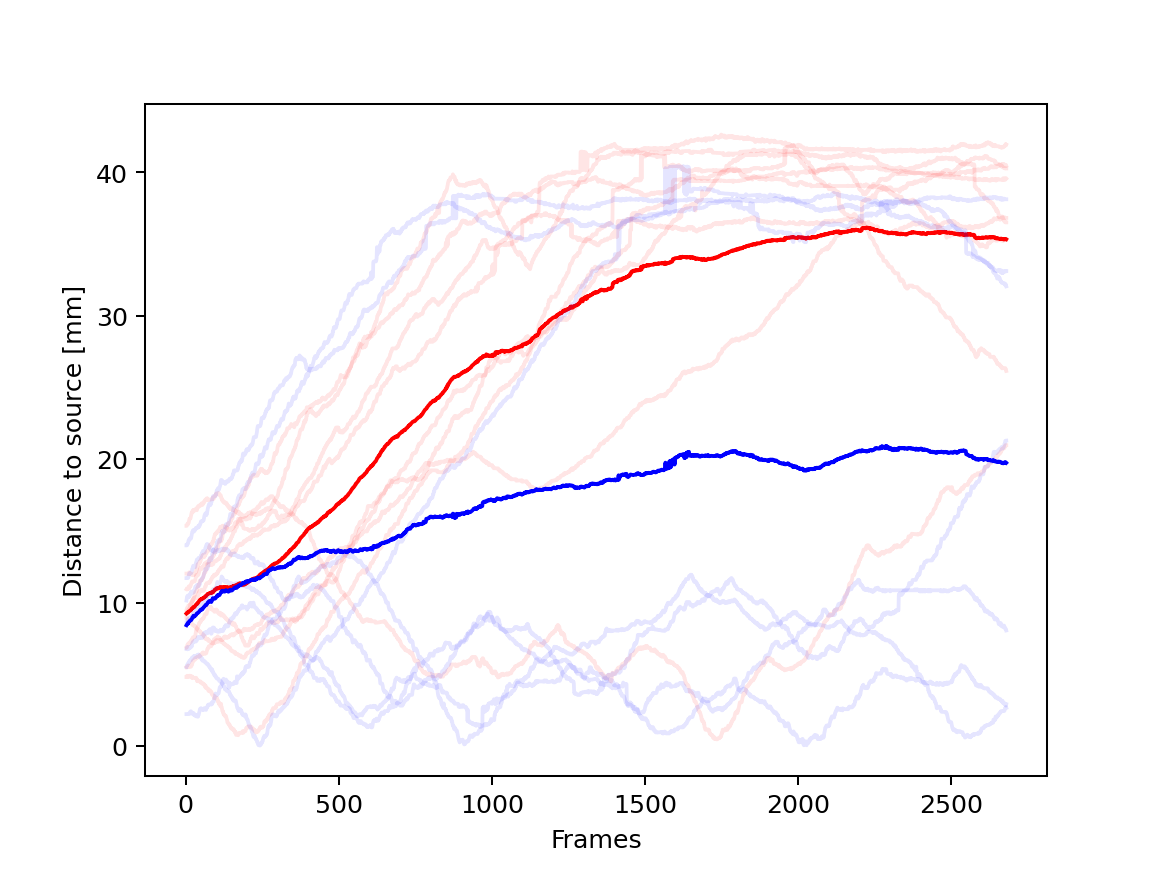

/var/folders/q0/9m96f32j1pl31hsqz1jkr4mr0000gq/T/ipykernel_27617/3375846228.py:6: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(exp_cond1_np, axis=1), color='red')
/var/folders/q0/9m96f32j1pl31hsqz1jkr4mr0000gq/T/ipykernel_27617/3375846228.py:9: RuntimeWarning: Mean of empty slice
  ax.plot(np.nanmean(exp_cond2_np, axis=1), color='blue')


Text(0.5, 0, 'Frames')

In [41]:
# create a figure
figure = plt.figure()
ax = figure.add_subplot(111)

# plot the data
ax.plot(np.nanmean(exp_cond1_np, axis=1), color='red')
ax.plot(exp_cond1_np, color='red', alpha=0.1)

ax.plot(np.nanmean(exp_cond2_np, axis=1), color='blue')
ax.plot(exp_cond2_np, color='blue', alpha=0.1)

# label the axis
ax.set_ylabel('Distance to source [mm]')
ax.set_xlabel('Frames')

In [42]:
# To make a statement we need to run a test and display what we are testing

start = 0 # seconds
end = 180 # seconds

#######
# Now we need to convert from seconds to frames by multiplying desired start and end by framerate
start = start * recording_fps1
end = end * recording_fps1

# create a figure
figure = plt.figure()
ax = figure.add_subplot(111)

# Now we plot a boxplot
ax.boxplot([np.nanmean(exp_cond1_np[start:end], axis=0),
            np.nanmean(exp_cond2_np[start:end], axis=0)])

<IPython.core.display.Javascript object>

{'whiskers': [<matplotlib.lines.Line2D at 0x293bf8350>,
 'caps': [<matplotlib.lines.Line2D at 0x293bf9690>,
 'boxes': [<matplotlib.lines.Line2D at 0x293ac0710>,
 'medians': [<matplotlib.lines.Line2D at 0x293bfa810>,
 'fliers': [<matplotlib.lines.Line2D at 0x293bf9510>,
 'means': []}

# Statistical testing

First, we test whether the distributions are normal

In [43]:
print(stats.shapiro(np.nanmean(exp_cond1_np[start:end], axis=0)))

ShapiroResult(statistic=0.8251278400421143, pvalue=0.03936578333377838)


In [44]:
print(stats.shapiro(np.nanmean(exp_cond2_np[start:end], axis=0)))

ShapiroResult(statistic=0.7946270108222961, pvalue=0.036230359226465225)


Shapiro-Wilk tests whether data is normally distributed. If it is significant it means the data is NOT normally distributed and one has to use non-parametric tests (e.g Wilcoxon) instead of parametric tests (e.g. T-test).

Next, we test whether the variance between the two (or more) contain the same variance, another assumption of parametric tests.

In [45]:
print(stats.levene(np.nanmean(exp_cond1_np[start:end], axis=0),
                   np.nanmean(exp_cond2_np[start:end], axis=0)))

LeveneResult(statistic=1.8005727748529303, pvalue=0.20100259795894176)


If none of the above are significant (p<0.05) we can use the parametric t-test (or ANOVA)

In [46]:
print(stats.ttest_ind(np.nanmean(exp_cond1_np[start:end], axis=0),
                      np.nanmean(exp_cond2_np[start:end], axis=0)))


Ttest_indResult(statistic=1.979742934277221, pvalue=0.06773996352985914)


Else we can use the non-parametric ranksums test

In [47]:
print(stats.ranksums(np.nanmean(exp_cond1_np[start:end], axis=0),
                     np.nanmean(exp_cond2_np[start:end], axis=0)))

RanksumsResult(statistic=1.6406939844773856, pvalue=0.10086095426924907)


# Take a third condition

In [61]:
# Open a window which allows you to select the folder containing the data of interest
root = Tk()
root.withdraw()
filepath3 = pathlib.Path(filedialog.askdirectory())
print(filepath3)
# next, we collect the individual 'distance_to_source.csv' files from each experiment

# Run the function defined above             
exp_cond3, recording_fps3 = collect_data(filepath3)
            
exp_cond3_np = convert_list_to_np_array(exp_cond3) # convert the list to a numpy array

I:\My Drive\PhD\vanishing spikes\behavior\analysis\EtB 10mM\Or42b SF (MS92xMS133)


In [62]:
# create a figure
figure = plt.figure()
ax = figure.add_subplot(111)

# plot the data
ax.plot(np.nanmean(exp_cond1_np, axis=1), color='red')
ax.plot(exp_cond1_np, color='red', alpha=0.1)

ax.plot(np.nanmean(exp_cond2_np, axis=1), color='blue')
ax.plot(exp_cond2_np, color='blue', alpha=0.1)

ax.plot(np.nanmean(exp_cond3_np, axis=1), color='green')
ax.plot(exp_cond3_np, color='green', alpha=0.1)

# label the axis
ax.set_ylabel('Distance to source [mm]')
ax.set_xlabel('Frames')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Frames')

<IPython.core.display.Javascript object>


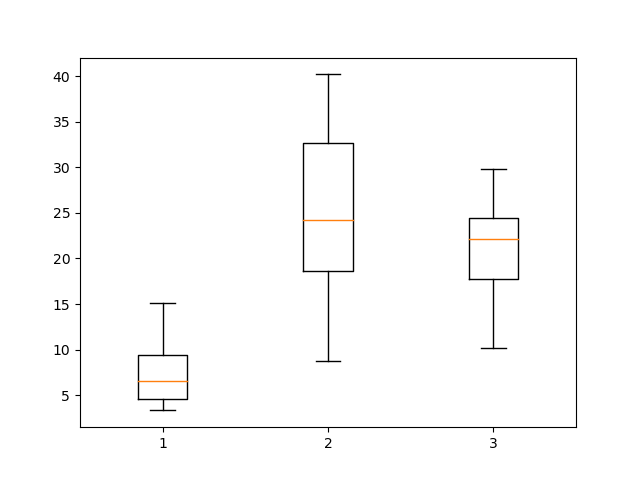

{'whiskers': [<matplotlib.lines.Line2D at 0x2a4c1efb670>,
 'caps': [<matplotlib.lines.Line2D at 0x2a4c1efbbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a4c1edd0f0>,
 'medians': [<matplotlib.lines.Line2D at 0x2a4c1edfdf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2a4c1f382b0>,
 'means': []}

In [63]:
# To make a statement we need to run a test and display what we are testing

start = 0 # seconds
end = 180 # seconds

#######
# Now we need to convert from seconds to frames by multiplying desired start and end by framerate
start = start * recording_fps1
end = end * recording_fps1

# create a figure
figure = plt.figure()
ax = figure.add_subplot(111)

# Now we plot a boxplot
ax.boxplot([np.nanmean(exp_cond1_np[start:end], axis=0),
            np.nanmean(exp_cond2_np[start:end], axis=0),
            np.nanmean(exp_cond3_np[start:end], axis=0)])

In [64]:
print(stats.shapiro(np.nanmean(exp_cond3_np[start:end], axis=0)))

ShapiroResult(statistic=0.9711434245109558, pvalue=0.8567744493484497)


If none of the above are significant (p<0.05) we can use the parametric ANOVA

In [65]:
print(stats.f_oneway(np.nanmean(exp_cond1_np[start:end], axis=0),
                     np.nanmean(exp_cond2_np[start:end], axis=0),
                     np.nanmean(exp_cond3_np[start:end], axis=0)))

F_onewayResult(statistic=34.141582493713024, pvalue=5.989429322374899e-10)


Else we can use the non-parametric ranksums test

In [66]:
print(stats.kruskal(np.nanmean(exp_cond1_np[start:end], axis=0),
                    np.nanmean(exp_cond2_np[start:end], axis=0),
                    np.nanmean(exp_cond3_np[start:end], axis=0)))

KruskalResult(statistic=31.541539126963016, pvalue=1.4152781546156163e-07)
